In [3]:
%matplotlib inline
### Standard imports
import uproot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
### HEPKIT imports
import hepkit.hepData as hd
import hepkit.hepIO as hio
import hepkit.hepPlot as hp
import hepkit.hepFormat as hf
### Settings
hf.DefaultSetup()
hf.DefaultSetup()

In [10]:
dirPath = '/Users/sdporzio/Data/Simulation_AlphaSourceVUVLamp/20-09-27_NewConfigurationSmallerChamber/'
fNames = [
'0.-off_20000000-ev_100-s.root',
'0.5-off_20000000-ev_100-s.root',
'0.75-off_20000000-ev_100-s.root',
'1.-off_20000000-ev_100-s.root',
]
    
md, tr, ev, alphas, contAlphas = {}, {}, {}, {}, {}

In [11]:
# Open root files
for fName in tqdm(fNames):
    md[fName] = hio.OpenRoot(dirPath+fName,'metadata')
    tr[fName] = hio.OpenRoot(dirPath+fName,'tracks_data')
    ev[fName] = hio.OpenRoot(dirPath+fName,'event_data')
    tr[fName]['distEnd'] = tr[fName].eval('sqrt(xEnd**2. + yEnd**2.)')
    
    alphas[fName] = tr[fName].query('particle_pdg==1000020040') # Select alphas
    contAlphas[fName] = alphas[fName].query('exitedCollection==0') # Select fully contained alphas

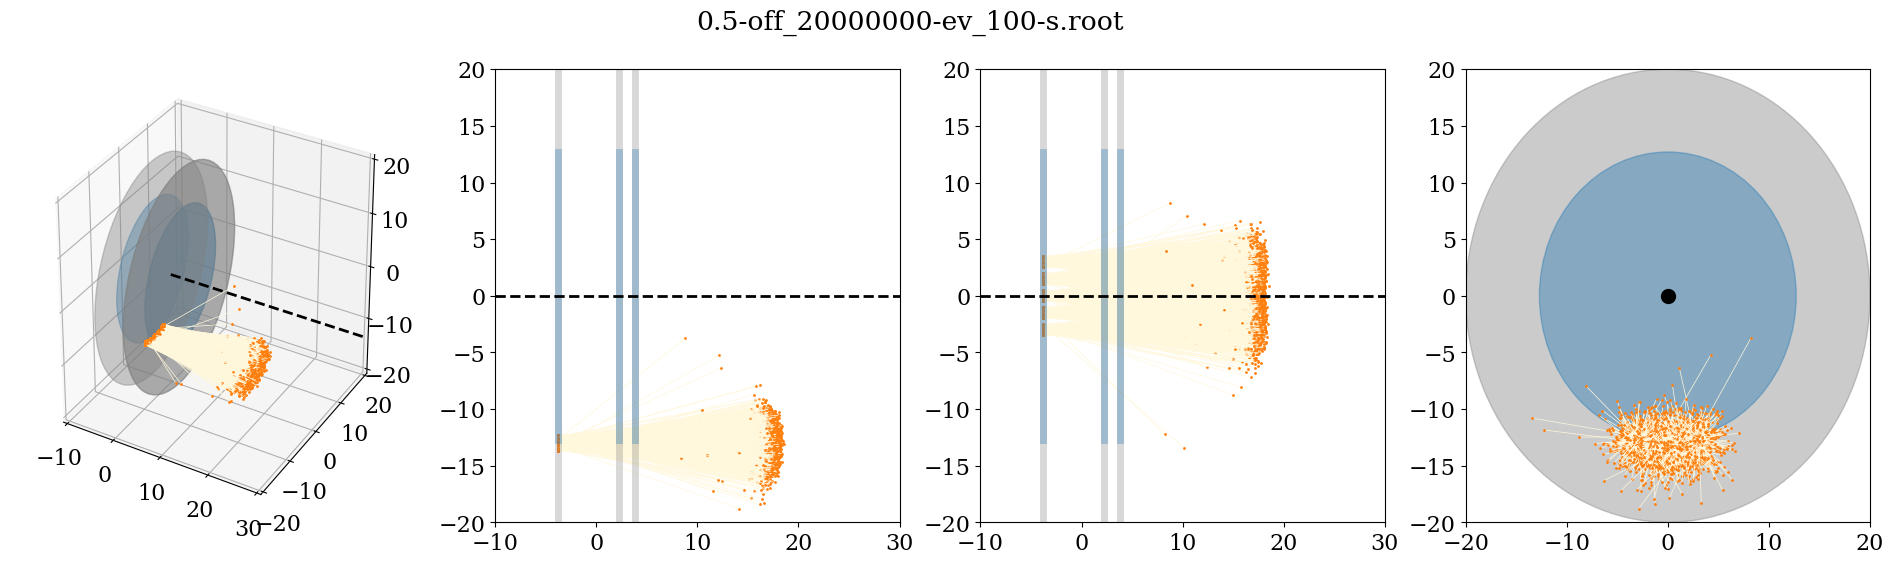

In [14]:
# Select file
fName = fNames[1]
maxParts = len(alphas[fName])
# maxParts = 100

# Create array of coordinates
xs, ys, zs = [],[],[]

for i in tqdm(range(maxParts)):
#     if(alphas[fName].iloc[i]['zEnd']<5):
    xs.append([alphas[fName].iloc[i]['xStart'],alphas[fName].iloc[i]['xEnd']])
    ys.append([alphas[fName].iloc[i]['yStart'],alphas[fName].iloc[i]['yEnd']])
    zs.append([alphas[fName].iloc[i]['zStart'],alphas[fName].iloc[i]['zEnd']])

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Circle, PathPatch
import mpl_toolkits.mplot3d.art3d as art3d

width = 40
length = 40
offset_back = -7.6/2.
offset_front = offset_back+6
offset_front2 = offset_back+7.6





zlims = [-10,length-10]
xlims = [-width/2.,width/2.]
ylims = [-width/2.,width/2.]

# fig = plt.figure(figsize=(8,8),facecolor='white',dpi=100)
# ax = fig.add_subplot(111, projection='3d')
# ax.axes.set_xlim3d(left=zlims[0], right=zlims[1]) 
# ax.axes.set_ylim3d(bottom=ylims[0], top=ylims[1]) 
# ax.axes.set_zlim3d(bottom=xlims[0], top=xlims[1])
# p1 = Circle((0, 0), width/2., zorder=-1, alpha=0.4,color='C7')
# p2 = Circle((0, 0), 25.4/2., zorder=-1, alpha=0.4,color='C0')
# ax.add_patch(p1)
# ax.add_patch(p2)
# art3d.pathpatch_2d_to_3d(p1, z=offset, zdir="x")
# art3d.pathpatch_2d_to_3d(p2, z=offset, zdir="x")
# # plt.plot(es['zStart'],es['xStart'],es['yStart'],ls='',marker='o',color='C1',markersize=0.1,zorder=99)
# plt.plot([0,length],[0,0],[0,0],ls='--',color='black',lw=2,zorder=99)
# for i in range(len(xs)):
#     plt.plot(zs[i],xs[i],ys[i],ls='-',color='cornsilk',lw=0.5,marker='o',markerfacecolor='C1',markeredgecolor='C1',markersize=1,zorder=99)
# plt.title(fName)
# plt.show()


fig = plt.figure(figsize=(24,6),facecolor='white',dpi=100)
plt.gca().set_rasterized(True)
# plt.subplot(141)
ax = fig.add_subplot(141, projection='3d',rasterized=True)
ax.axes.set_xlim3d(left=zlims[0], right=zlims[1]) 
ax.axes.set_ylim3d(bottom=ylims[0], top=ylims[1]) 
ax.axes.set_zlim3d(bottom=xlims[0], top=xlims[1])
p1_left = Circle((0, 0), width/2., zorder=-1, alpha=0.4,color='C7')
p2_left = Circle((0, 0), 25.4/2., zorder=-1, alpha=0.4,color='C0')
p1_right = Circle((0, 0), width/2., zorder=-1, alpha=0.4,color='C7')
p2_right = Circle((0, 0), 25.4/2., zorder=-1, alpha=0.4,color='C0')
p1_right2 = Circle((0, 0), width/2., zorder=-1, alpha=0.4,color='C7')
p2_right2 = Circle((0, 0), 25.4/2., zorder=-1, alpha=0.4,color='C0')
ax.add_patch(p1_left)
ax.add_patch(p2_left)
ax.add_patch(p1_right)
ax.add_patch(p2_right)
ax.add_patch(p1_right2)
ax.add_patch(p2_right2)
art3d.pathpatch_2d_to_3d(p1_left, z=offset_back, zdir="x")
art3d.pathpatch_2d_to_3d(p2_left, z=offset_back, zdir="x")
art3d.pathpatch_2d_to_3d(p1_right, z=offset_front, zdir="x")
art3d.pathpatch_2d_to_3d(p2_right, z=offset_front, zdir="x")
art3d.pathpatch_2d_to_3d(p1_right2, z=offset_front, zdir="x")
art3d.pathpatch_2d_to_3d(p2_right2, z=offset_front, zdir="x")
# plt.plot(es['zStart'],es['xStart'],es['yStart'],ls='',marker='o',color='C1',markersize=0.1,zorder=99)
plt.plot([0,length],[0,0],[0,0],ls='--',color='black',lw=2,zorder=99)
for i in range(len(xs)):
    plt.plot(zs[i],xs[i],ys[i],ls='-',color='cornsilk',lw=0.5,marker='o',markerfacecolor='C1',markeredgecolor='C1',markersize=1,zorder=99)

plt.subplot(142,rasterized=True)
plt.gca().set_rasterized(True)
# plt.plot(es['zStart'],es['yStart'],ls='',marker='o',color='C1',markersize=0.02,zorder=99)
for i in range(len(xs)):
    plt.plot(zs[i],ys[i],ls='-',color='cornsilk',lw=0.5,marker='o',markerfacecolor='C1',markeredgecolor='C1',markersize=1)
plt.plot([offset_back,offset_back],[-width/2.,width/2.],color='C7',lw=5,alpha=0.3,ls='-')
plt.plot([offset_back,offset_back],[-25.4/2.,25.4/2.],color='C0',lw=5,alpha=0.3,ls='-')
plt.plot([offset_front,offset_front],[-width/2.,width/2.],color='C7',lw=5,alpha=0.3,ls='-')
plt.plot([offset_front,offset_front],[-25.4/2.,25.4/2.],color='C0',lw=5,alpha=0.3,ls='-')
plt.plot([offset_front2,offset_front2],[-width/2.,width/2.],color='C7',lw=5,alpha=0.3,ls='-')
plt.plot([offset_front2,offset_front2],[-25.4/2.,25.4/2.],color='C0',lw=5,alpha=0.3,ls='-')
plt.xlim(zlims)
plt.ylim(ylims)
plt.axhline(0,ls='--',color='black',lw=2)

plt.subplot(143,rasterized=True)
plt.gca().set_rasterized(True)
# plt.plot(es['zStart'],es['xStart'],ls='',marker='o',color='C1',markersize=0.02,zorder=99)
for i in range(len(xs)):
    plt.plot(zs[i],xs[i],ls='-',color='cornsilk',lw=0.5,marker='o',markerfacecolor='C1',markeredgecolor='C1',markersize=1)
plt.plot([offset_back,offset_back],[-width/2.,width/2.],color='C7',lw=5,alpha=0.3,ls='-')
plt.plot([offset_back,offset_back],[-25.4/2.,25.4/2.],color='C0',lw=5,alpha=0.3,ls='-')
plt.plot([offset_front,offset_front],[-width/2.,width/2.],color='C7',lw=5,alpha=0.3,ls='-')
plt.plot([offset_front,offset_front],[-25.4/2.,25.4/2.],color='C0',lw=5,alpha=0.3,ls='-')
plt.plot([offset_front2,offset_front2],[-width/2.,width/2.],color='C7',lw=5,alpha=0.3,ls='-')
plt.plot([offset_front2,offset_front2],[-25.4/2.,25.4/2.],color='C0',lw=5,alpha=0.3,ls='-')
plt.xlim(zlims)
plt.ylim(xlims)
plt.axhline(0,ls='--',color='black',lw=2)

plt.subplot(144,rasterized=True)
plt.gca().set_rasterized(True)
# plt.plot(es['xStart'],es['yStart'],ls='',marker='o',color='C1',markersize=0.02,zorder=99)
for i in range(len(xs)):
    plt.plot(xs[i],ys[i],ls='-',color='cornsilk',lw=0.5,marker='o',markerfacecolor='C1',markeredgecolor='C1',markersize=1)
plt.scatter(0,0,color='black',s=100)
ax = plt.gca()
t1 = Circle((0, 0), width/2., zorder=-1, alpha=0.4,color='C7')
t2 = Circle((0, 0), 25.4/2., zorder=-1, alpha=0.4,color='C0')
ax.add_patch(t1)
ax.add_patch(t2)
plt.xlim(xlims)
plt.ylim(ylims)
plt.suptitle(fName)
plt.savefig('img/events.pdf',bbox_inches='tight', pad_inches=0.3)
plt.show()

hd.SlackMe('Plots ready')